In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [22]:
data = pd.read_csv("IMDb_Movies_India.csv", encoding='latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [24]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [25]:
nulls = data[data.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5688 non-null   object 
 1   Year      5688 non-null   float64
 2   Duration  5688 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5688 non-null   float64
 5   Votes     5688 non-null   object 
 6   Director  5688 non-null   object 
 7   Actor 1   5688 non-null   object 
 8   Actor 2   5688 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(2), object(8)
memory usage: 488.8+ KB


In [27]:
data['Name'] = data['Name'].str.extract('([A-Za-z\s\'\-]+)')


In [28]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)

In [29]:
data.loc[:, 'Votes'] = pd.to_numeric(data['Votes'].astype(str).str.replace(',', ''), errors='coerce')
data.loc[:, 'Year'] = pd.to_numeric(data['Year'].astype(str).str.replace('-', ''), errors='coerce')
data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019.0,110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019.0,110 min,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147 min,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147 min,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989.0,125 min,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999.0,129 min,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999.0,129 min,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998.0,130 min,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [30]:
data = data.drop_duplicates(subset=['Name'], keep=False)

In [32]:
data.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,1528,1528.000000,1528,1528,1528.000000,1528.0,1528,1528,1528,1528
unique,1528,NaN,136,20,NaN,443.0,1114,1010,1131,1154
top,Gadhvi,NaN,120 min,Drama,NaN,7.0,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,NaN,66,789,NaN,58.0,13,22,12,16
mean,NaN,1997.972513,NaN,NaN,5.976243,NaN,NaN,NaN,NaN,NaN
std,NaN,21.181921,NaN,NaN,1.412547,NaN,NaN,NaN,NaN,NaN
min,NaN,1931.000000,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1985.000000,NaN,NaN,5.100000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2004.000000,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data.loc[:,'Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data.loc[:,'Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data.loc[:,'Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data.loc[:,'Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data.loc[:,'Actor3_encoded'] = actor3_mean_rating

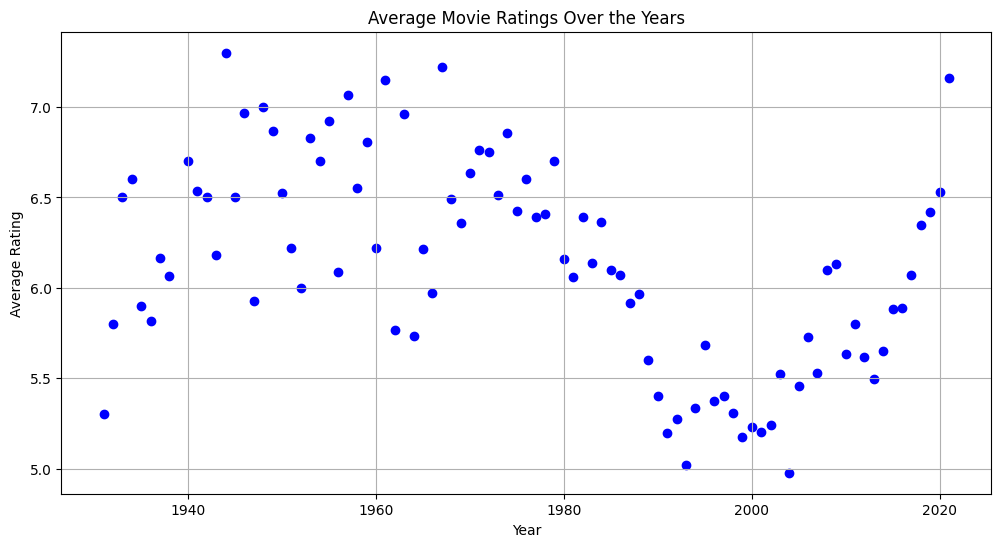

In [44]:
ratings_by_year = data.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(ratings_by_year['Year'], ratings_by_year['Rating'], marker='o', color='b', linestyle='-')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

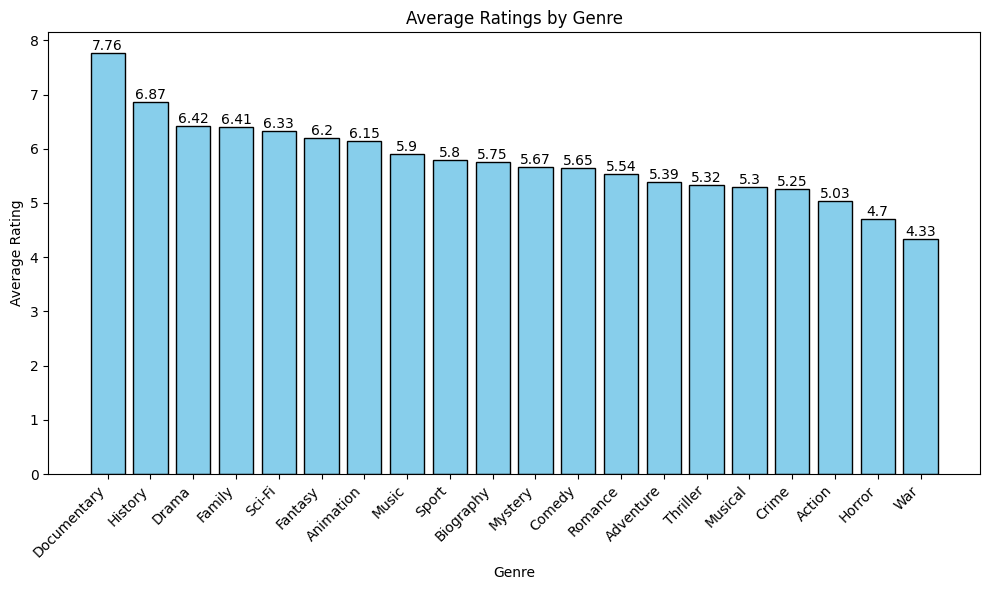

In [53]:
genre_avg_ratings = data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(genre_avg_ratings.index, genre_avg_ratings, color='skyblue', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.show()


In [66]:
data['Duration'] = data['Duration'].apply(lambda x: int(x.replace('min', '')) if isinstance(x, str) else x)

# Display the updated DataFrame
data.head()

<ipython-input-66-996ff8f4ef60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration'] = data['Duration'].apply(lambda x: int(x.replace('min', '')) if isinstance(x, str) else x)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,Gadhvi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.420152,7.000,6.850000,7.000000,7.000
10,An Ode to Lost Love,2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.420152,6.200,5.766667,5.100000,6.200
11,Ek Tera Saath,2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.698529,5.900,5.900000,5.900000,5.900
30,Park Avenue,2005.0,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,6.420152,6.525,6.900000,6.866667,5.700
32,th August,1993.0,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,6.420152,5.400,5.600000,6.400000,5.825


In [68]:
X = data[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [70]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_test)
print()
print(y_pred)

4699     5.1
10168    2.7
11471    3.6
1312     3.7
9004     4.2
        ... 
10373    8.5
1434     3.6
4943     7.3
458      6.7
8471     4.5
Name: Rating, Length: 306, dtype: float64

[4.83 2.69 3.89 3.88 4.47 6.5  6.1  4.43 6.61 6.6  6.9  4.85 5.84 5.84
 8.1  8.2  4.72 6.34 6.23 5.16 5.46 6.08 5.23 4.22 5.63 4.18 6.03 6.51
 4.91 6.3  8.21 6.85 7.6  8.19 6.02 4.95 6.99 6.29 6.23 8.1  5.97 6.2
 5.74 7.1  4.95 6.57 6.4  5.17 7.07 4.8  7.22 7.75 4.9  4.25 6.68 6.82
 5.45 6.47 5.06 5.8  6.21 6.6  5.41 6.14 4.43 6.31 7.9  6.85 7.5  9.3
 6.91 5.7  5.37 6.6  7.12 6.64 4.27 6.11 4.39 4.65 6.9  4.2  4.78 4.83
 5.85 6.56 6.51 9.18 4.01 6.39 4.95 5.84 7.1  5.56 6.69 5.82 5.9  8.1
 3.75 6.61 2.67 7.27 6.58 7.33 5.18 5.49 4.59 7.33 5.6  8.6  6.15 5.65
 7.54 5.34 5.4  6.7  4.87 6.   6.24 7.13 4.17 6.46 6.72 6.38 5.62 4.68
 3.62 7.38 9.   7.4  4.98 6.71 7.94 5.24 6.26 7.   4.35 6.54 5.7  5.01
 5.92 5.35 5.74 5.87 9.31 8.71 5.21 6.18 5.68 8.   7.23 5.43 5.86 7.29
 6.73 3.84 5.96 5.49 6.21 4.34 3.34 

In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.11745598692810465
R-squared: 0.9384244186699481


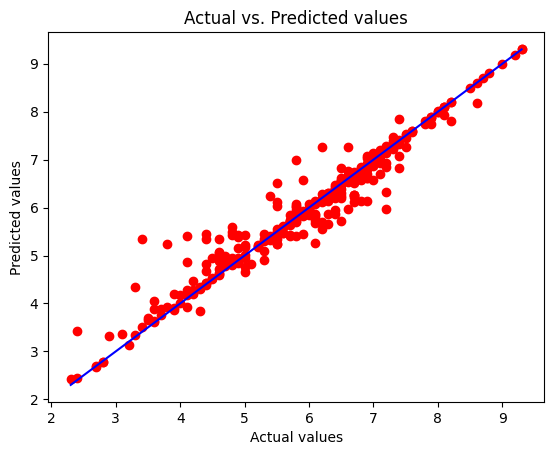

In [77]:
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='-', color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()